In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import beta
from scipy.optimize import curve_fit
from scipy import integrate
from scipy import special as scipy_special

In [23]:
df = pd.read_csv('lahman_1871-2023_csv/Batting.csv')
df = df[df["AB"] > 500]
df = df.groupby("playerID")[['H', 'AB']].sum()
df["Average"] = df["H"] / df["AB"]
df

,H,AB,Average
playerID,,,
aaronha01,2979,9484,0.314108
abbated01,318,1189,0.267452
abbeych01,306,1039,0.294514
abramcj01,138,563,0.245115
abreubo01,2014,6873,0.293031
...,...,...,...
zimmehe01,850,2761,0.307859
zimmery01,1167,4072,0.286591
ziskri01,1049,3669,0.285909


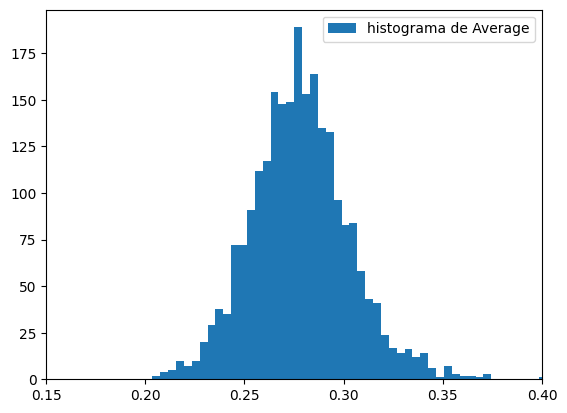

In [24]:
plt.plot()
plt.hist(df['Average'], label='histograma de Average', bins=50)
plt.legend()
plt.xlim(0.15, 0.4)
plt.show()

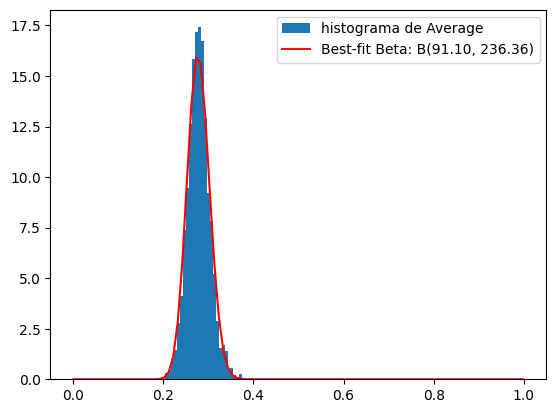

In [25]:
def estimate_alpha_beta(x):
    mean_x = np.mean(x)
    var_x = np.var(x)
    alpha_est = mean_x * (mean_x * (1 - mean_x) / var_x - 1)
    beta_est = (1 - mean_x) * (mean_x * (1 - mean_x) / var_x - 1)
    return alpha_est, beta_est

alpha_0, beta_0 = estimate_alpha_beta(df['Average'])

x = np.linspace(0, 1, 100)
y = beta.pdf(x, alpha_0, beta_0)
plt.hist(df['Average'], label='histograma de Average', bins=30, density=True)
plt.plot(x, y, 'r-', label='Best-fit Beta: B({:.2f}, {:.2f})'.format(alpha_0, beta_0))
plt.legend()
plt.xlim(-0.05, 1.05)
plt.show()

In [26]:
def estimate_alpha_beta(x):
    mean_x = np.mean(x)
    var_x = np.var(x)
    alpha = mean_x * (mean_x * (1 - mean_x) / var_x - 1)
    beta = (1 - mean_x) * (mean_x * (1 - mean_x) / var_x - 1)
    return alpha, beta

alpha, beta = estimate_alpha_beta(df['Average'])
print("Alpha:", alpha)
print("Beta:", beta)

Alpha: 91.09618403361458
Beta: 236.35693266883703


In [27]:
# Prior Campeones del mundo
df_arg = pd.DataFrame({"Player":[], "Goals":[], "Misses":[], "GoalRatio":[]})

df_arg = df_arg.append({"Player":"FrancoArmani", "Goals":0, "Misses":0, "GoalRatio":0}, ignore_index=True)

naive_prior_alpha = 13
naive_prior_beta = 4

naive_post_alpha = naive_prior_alpha + montiel_penalty_goals
naive_post_alpha = naive_prior_beta + montiel_penalty_misses

AttributeError: 'DataFrame' object has no attribute 'append'

Vamos a buscar la probabilidad de que Montiel convierta el penal numero 13.

Promedio 0.9260518111532569
Esperanza 0.9285714285714286


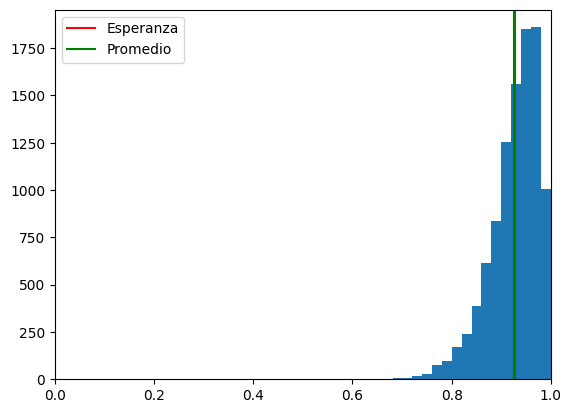

In [ ]:
# Generamos unos titas randoms.
# A partir de esos titas simulamos la cantidad de goles hechos.
# Estos goles los guardamos en "tiros".
samples = np.array([])
for i in range(1,10000):
    tita = np.random.beta(25, 2)
    samples = np.append(samples, tita)


# Calculamos la mediana y el promedio de "tiros" 
mean= np.mean(samples)
print("Promedio", mean)
print("Esperanza", 13 / (13+1))     # E = alpha / alpha + beta 
fig, ax = plt.subplots(1)
ax.hist(samples, bins = 20)
ax.set_xlim(0,1)
ax.axvline(13 / (13+1), color ="red", label = "Esperanza")
ax.axvline(mean, color = "green", linestyle = "-", label = "Promedio")
ax.legend()
plt.show()

- Segun los Bayesianos, tenemos un 92.6% de probabilidades de ver a Montiel meter el 13vo tiro.

- Mientras que los frecuentistas dirian que es el 100%.

### e) Estimar la probabilidad de que Montiel meta al menos 8 de los próximos 10 penales que patee.

Teniendo el Histograma anterior, podriamos simplemente sumar los casos en que Montiel haya metido 8, 9 y 10 penales y dividirlos por la cantidad total de intentos. 

In [ ]:
# Filtramos los casos en que Montiel haya metido >= 8 goles
tiros_predichos_filtrados = [tiro for tiro in goals_predicted if tiro >= 8]

# Calculamos el promedio frecuentista de que meta >= 8 goles.
len(tiros_predichos_filtrados) / len(goals_predicted)

0.9395939593959396